<a href="https://colab.research.google.com/github/Leo-alves2/Grafico_Pyplot/blob/main/Graficos_Diferentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Um gráfico de barras é um gráfico bidimensional com barras retangulares no eixo X ou Y. Usamos as barras retangulares para comparar valores entre categorias discretas comparando suas alturas ou comprimentos. Este gráfico é típico na visualização de dados, pois é simples de criar e fácil de entender.

No entanto, em algumas situações, como criar infográficos ou apresentar dados ao público que precisam chamar a atenção das pessoas, o gráfico de barras pode não ser atraente o suficiente. Às vezes, usar muitos gráficos de barras pode resultar em uma exibição maçante.

Há uma variedade de gráficos na visualização de dados. Na prática, os gráficos podem ser melhorados ou mudar de forma. Este artigo mostrará nove ideias que você pode não apenas usar em vez do gráfico de barras, mas também fazer com que os resultados obtidos pareçam bons.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Para mostrar que o método mencionado neste artigo pode ser aplicado a dados do mundo real, usaremos dados de uma lista de países por emissões de dióxido de carbono na Wikipedia. Este artigo mostra uma lista de estados e territórios soberanos por emissões de CO2 em 2018.

Eu segui os passos úteis para baixar os dados do Web Scraping a Wikipedia Table em um Dataframe .
https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451

In [ ]:
import requests 
from bs4 import BeautifulSoup
wikiurl='https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions'
table_class='wikitable sortable jquery-tablesorter'

response=requests.get(wikiurl)
#status 200: The server successfully answered the http request 
print(response.status_code)

200


Use BeautifulSoup para analisar os dados obtidos

In [ ]:
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table',{'class':"wikitable"})

df2018 = pd.read_html(str(table))[0]
df2018

Country[20] Fossil CO2 emissions(Mt CO2)             \
                        Country[20]                         1990       2005   
0                             World                    22674.116  30049.809   
1    World – International Aviation                      258.941    422.777   
2    World – International Shipping                      371.804    572.169   
3                       Afghanistan                        2.546      1.063   
4                           Albania                        6.583      4.196   
..                              ...                          ...        ...   
207                         Vietnam                       20.182     99.231   
208                  Western Sahara                        0.144      0.227   
209                           Yemen                        6.887     21.768   
210                          Zambia                        2.955      2.457   
211                        Zimbabwe                       17.178     11.388   

               Fossil CO2 emissions                           \
          2017     2017(% of world) 2017 vs 1990: change (%)   
0    37077.404              100.00%                    63.5%   
1      543.381                1.47%                   109.8%   
2      677.248                1.83%                    82.2%   
3       11.422                0.03%                   348.6%   
4        5.026                0.01%                   -23.7%   
..         ...                  ...                      ...   
207    218.729                0.59%                   983.8%   
208      0.276                0.00%                    91.7%   
209     12.503                0.03%                    81.5%   
210      4.967                0.01%                    68.1%   
211     12.087                0.03%                   -29.6%   

    2017 – Fossil CO2 emissions                           \
    Per land area(t CO2/km2/yr) Per capita(t CO2/cap/yr)   
0                          73.0                      4.9   
1                           NaN                      NaN   
2                           NaN                      NaN   
3                          18.0                      0.3   
4                         175.0                      1.7   
..                          ...                      ...   
207                       660.0                      2.3   
208                         1.0                      0.5   
209                        24.0                      0.4   
210                         7.0                      0.3   
211                        31.0                      0.7   

      2018 CO2 emissions[21]                           
    Total including LUCF[22] Total excluding LUCF[23]  
0                   36431.11                 35247.21  
1                        NaN                      NaN  
2                        NaN                      NaN  
3                       7.59                     7.44  
4                       5.32                     5.56  
..                       ...                      ...  
207                   245.36                   257.86  
208                      NaN                      NaN  
209                     9.31                     9.31  
210                    40.47                     7.74  
211                    99.43                    12.27  

[212 rows x 10 columns]

Por exemplo, selecionarei a última coluna, Emissões de CO2 de 2018/Total excluindo LUCF (Mudança de Uso da Terra e Floresta) e filtrarei apenas países com emissões de CO2 entre 200 a 1000 MTCO2e (toneladas métricas de dióxido de carbono equivalente).

Os códigos abaixo podem ser modificados, caso você queira usar outras colunas ou alterar a faixa de emissões de CO2.

In [ ]:
#get lists of data
emi_ = df2018[('2018 CO2 emissions[21]', 'Total excluding LUCF[23]')]
country_ = list(df2018[('Country[20]', 'Country[20]')])
country_mod = [i.replace('\xa0',' ') for i in country_]

#create a DataFrame
df = pd.DataFrame(zip(country_mod,emi_), columns = ['countries', 'emission_2018'])

#remove the row of country that cannot be converted
df = df[df['countries']!='Serbia & Montenegro']  
df.iloc[:,1] = df.iloc[:,1].astype('float')
df = df[(df['emission_2018']>200) & (df['emission_2018']<1000)]
df['percentage'] = [i*100/sum(df['emission_2018']) for i in df['emission_2018']]
df.head(9)

,countries,emission_2018,percentage
12,Australia,386.62,4.310188
28,Brazil,427.71,4.768275
36,Canada,574.40,6.403632
60,Egypt,246.26,2.745401
72,France Monaco,309.96,3.455553
77,Germany,709.54,7.910224
94,Indonesia,583.11,6.500734
95,Iran,629.29,7.015566
99,Italy San Marino Vatican City,324.85,3.621553


Depois de obter o DataFrame, vamos classificar as emissões de CO2 para obter outro DataFrame. Ambos DataFrames, o DataFrame normal e ordenado, serão usados ​​para plotagem posteriormente. A razão por trás da criação de dois DataFrame é mostrar que os resultados podem ser diferentes.

In [ ]:
df_s = df.sort_values(by='emission_2018', ascending=False)
df_s.head(9)

,countries,emission_2018,percentage
77,Germany,709.54,7.910224
178,South Korea,630.87,7.033181
95,Iran,629.29,7.015566
94,Indonesia,583.11,6.500734
36,Canada,574.40,6.403632
167,Saudi Arabia,514.60,5.736958
127,Mexico,472.14,5.263598
177,South Africa,433.25,4.830037
28,Brazil,427.71,4.768275


Agora que tudo está pronto, vamos traçar um gráfico de barras para comparar com os resultados de outras visualizações posteriormente.

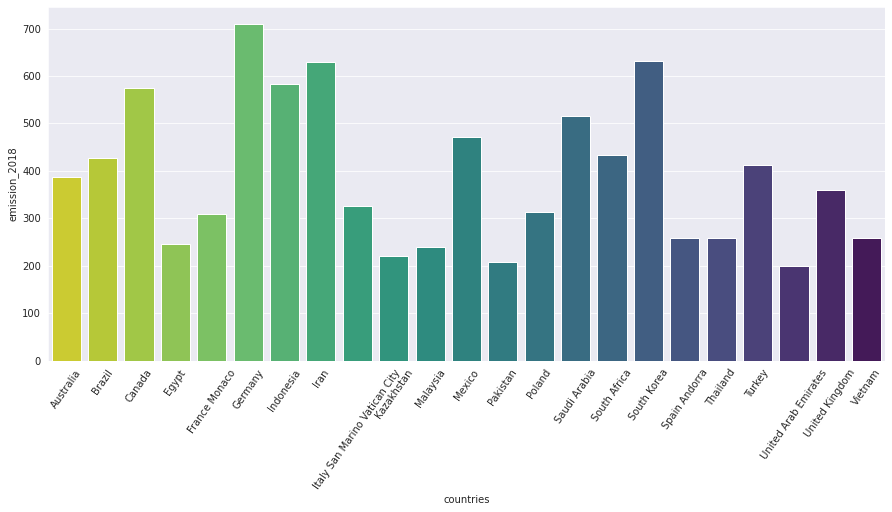

In [ ]:
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
g = sns.barplot(data=df, x='countries', y='emission_2018',
                ci=False, palette='viridis_r')
g.set_xticklabels(df['countries'], rotation=55, fontdict={'fontsize':10})
plt.show()

Antes de continuar, vamos definir uma função para extrair uma lista de cores para uso posterior em cada visualização.

In [ ]:
def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal

Aplique a função para obter uma lista de cores.

In [ ]:
pal_vi = get_color('viridis_r', len(df))
pal_plas = get_color('plasma_r', len(df))
pal_spec = get_color('Spectral', len(df))
pal_hsv = get_color('hsv', len(df))

Visualizações

Neste artigo, existem 9 visualizações, que podemos categorizar em dois grupos:

Modificando barras retangulares

Gráfico de barras circulares (também conhecido como Race Track Plot)
gráfico de barras radiais
Mapa de árvore
Gráficos de waffles
Gráfico de barras interativo
Alterando formulários

Gráfico de pizza
Gráfico de radar
Gráfico de bolhas
Embalagem circular

Alterando a direção com um gráfico de barras circular (também conhecido como gráfico de pista de corrida)

O conceito de um gráfico de barras circulares é expressar as barras ao redor do centro de um círculo. Cada barra começa no mesmo grau e se move na mesma direção. Aquele que pode completar o loop tem o valor mais alto.

Esta é uma boa idéia para chamar a atenção dos leitores. A propósito, as barras que param no meio do círculo são difíceis de ler. Tenha em atenção que o comprimento de cada barra não é igual. Os próximos ao centro terão um comprimento menor do que os distantes do centro.

Traçar um gráfico de barras circulares com o DataFrame

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


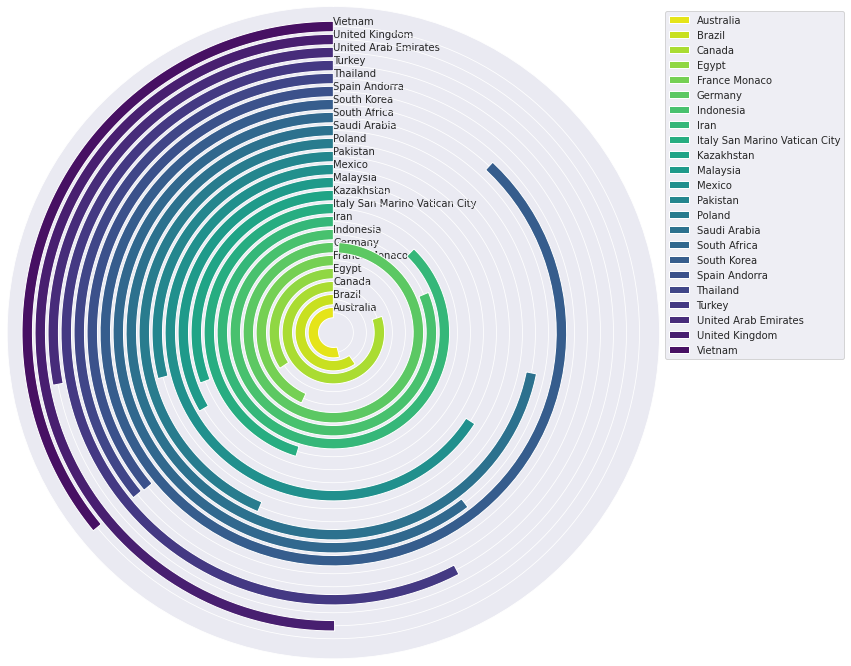

In [ ]:
import math
plt.gcf().set_size_inches(12, 12)
sns.set_style('darkgrid')

#set max value
max_val = max(df['emission_2018'])*1.01
ax = plt.subplot(projection='polar')

#set the subplot 
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(len(df)), labels= df['countries'])

#set the projection
ax = plt.subplot(projection='polar')

for i in range(len(df)):
    ax.barh(i, list(df['emission_2018'])[i]*2*np.pi/max_val,
            label=list(df['countries'])[i], color=pal_vi[i])

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

Traçar um gráfico de barras circulares com o DataFrame classificado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


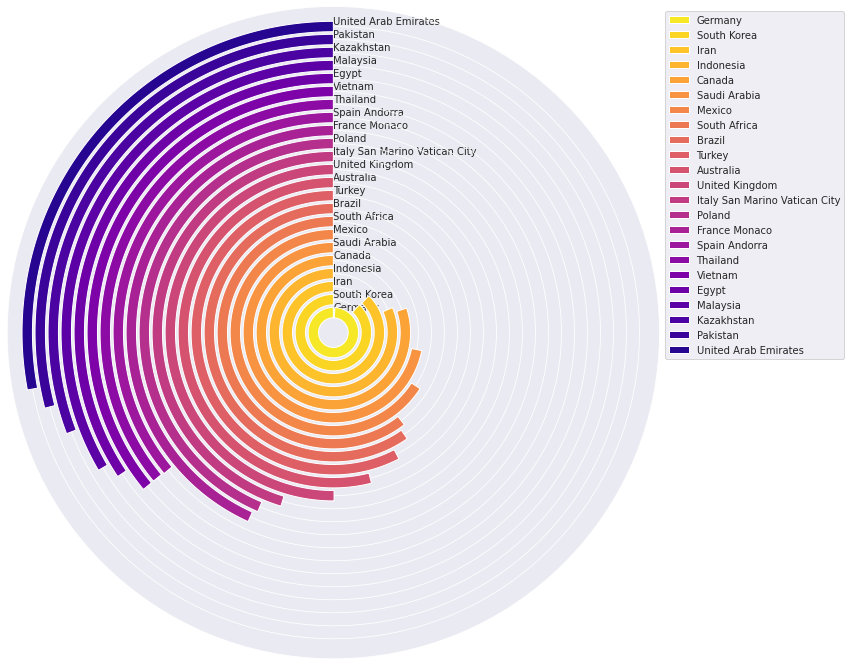

In [ ]:
import math
plt.gcf().set_size_inches(12, 12)
sns.set_style('darkgrid')

#set max value
max_val = max(df_s['emission_2018'])*1.01
ax = plt.subplot(projection='polar')

for i in range(len(df)):
    ax.barh(i, list(df_s['emission_2018'])[i]*2*np.pi/max_val,
            label=list(df_s['countries'])[i], color=pal_plas[i])

#set the subplot 
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(len(df)), labels= df_s['countries'])

#set the projection
ax = plt.subplot(projection='polar')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

2. Começando do centro com um gráfico de barras radial

O conceito de um gráfico de barras radial é variar a direção das barras. Em vez de ter a mesma direção, cada barra começa no centro de um círculo e se move em uma direção diferente até a borda do círculo.

Por favor, considere que as barras não localizadas adjacentes umas às outras podem ser difíceis de comparar. As etiquetas estão em ângulos diferentes ao longo das barras radiais; isso pode causar transtornos aos usuários.

Traçar um gráfico de barras radial com o DataFrame

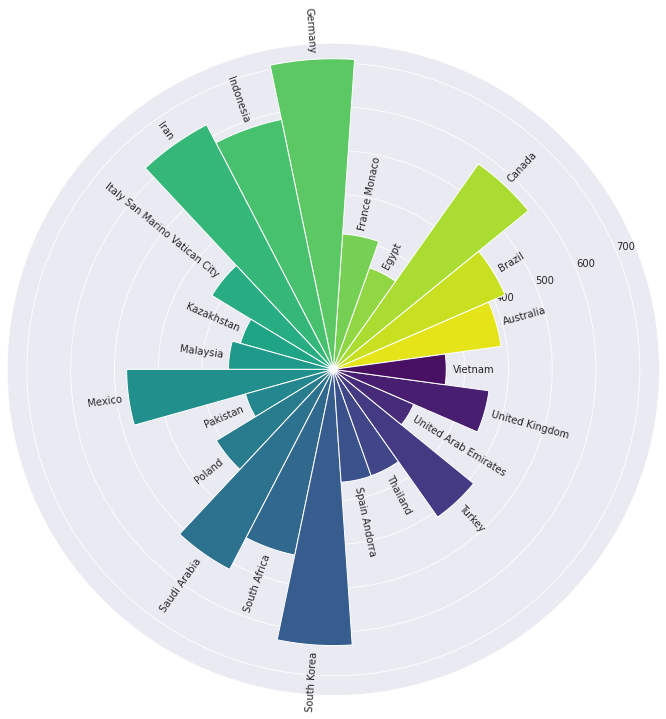

In [ ]:
plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.axis()

#set min and max value
lowerLimit = 0
max_v = df['emission_2018'].max()

#set heights and width
heights = df['emission_2018']
width = 2*np.pi / len(df.index)

#set index and angle
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color=pal_vi)
labelPadding = 15

for bar, angle, height, label in zip(bars,angles, heights, df['countries']):
    rotation = np.rad2deg(angle)
    alignment = ""
    #deal with alignment
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation, 
            rotation_mode="anchor")
    ax.set_thetagrids([], labels=[])
plt.show()

Plote um gráfico de barras radial com o DataFrame classificado

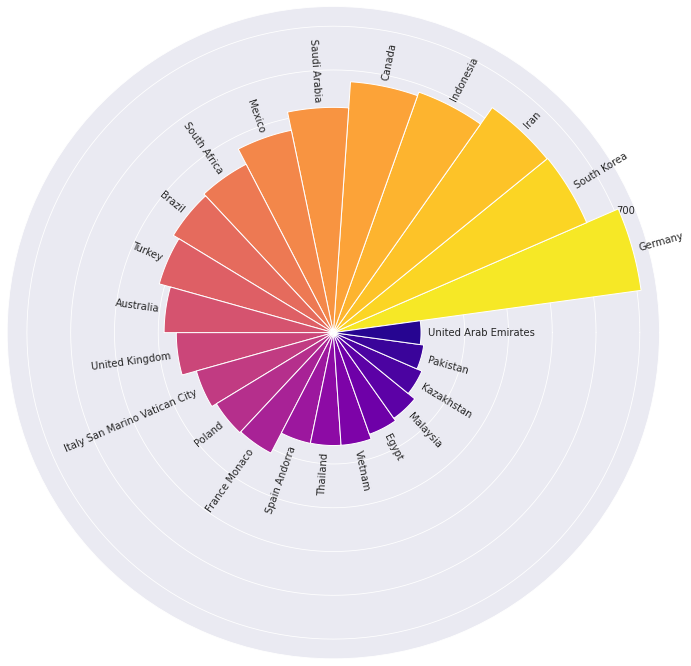

In [ ]:
plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.axis()

#set min and max value
lowerLimit = 0
max_v = df_s['emission_2018'].max()

#set heights and width
heights = df_s['emission_2018']
width = 2*np.pi / len(df_s.index)

#set index and angle
indexes = list(range(1, len(df_s.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color=pal_plas)
labelPadding = 15

for bar, angle, height, label in zip(bars,angles, heights, df_s['countries']):
    rotation = np.rad2deg(angle)
    alignment = ""
    #deal with alignment
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation, 
            rotation_mode="anchor")
    ax.set_thetagrids([], labels=[])
plt.show()

3. Usando a área para comparar com o Treemap

Um mapa de árvore ajuda a exibir dados hierárquicos usando áreas de retângulos. Mesmo que nossos dados não tenham hierarquia, ainda podemos aplicar um mapa de árvore mostrando apenas um nível de hierarquia.

Plotando um mapa de árvore, geralmente, os dados são classificados em ordem decrescente do valor máximo. Com muitos retângulos, lembre-se de que os pequenos podem ser difíceis de ler ou distinguir dos outros.

In [ ]:
import plotly.express as px
fig = px.treemap(df, path=[px.Constant('Countries'), 'countries'],
                 values=df['emission_2018'],
                 color=df['emission_2018'],
                 color_continuous_scale='Spectral_r',
                 color_continuous_midpoint=np.average(df['emission_2018'])
                )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

4. Combinando pequenos quadrados com um gráfico Waffle

Além do nome chique, o gráfico de waffle é uma boa ideia para criar um infográfico. Consiste em muitos quadrados menores combinados em um grande retângulo, fazendo com que o resultado pareça um waffle .

Normalmente, os quadrados são organizados em um layout de 10 por 10 para mostrar a proporção ou o progresso. A propósito, o número de quadrados pode ser alterado para se adequar aos dados.

Trace um gráfico de waffle exibindo as emissões de CO2 de cada país

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.2 MB 31.8 MB/s 


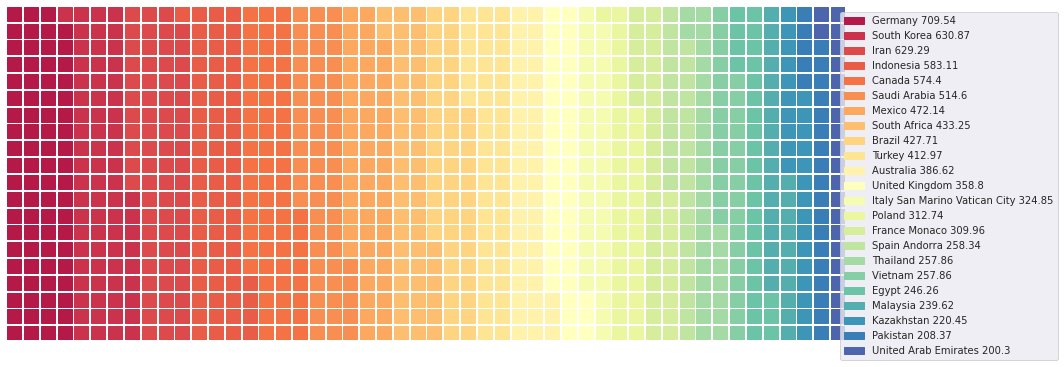

In [ ]:
#!pip install pywaffle
from pywaffle import Waffle
fig = plt.figure(FigureClass=Waffle, 
                 rows=20,
                 columns=50,
                 values=list(df_s['emission_2018']), 
                 colors=pal_spec,
                 labels=[i+' '+format(j, ',') for i,j in zip(df_s['countries'], df_s['emission_2018'])],
                 figsize = (15,6),
                 legend={'loc':'upper right',
                         'bbox_to_anchor': (1.26, 1)
                        })
plt.tight_layout() 
plt.show()

O resultado pode parecer atraente e colorido, mas é difícil distinguir entre tons de cor próximos. Isso pode ser considerado uma limitação do gráfico de waffle. Assim, pode-se dizer que o gráfico de waffle é adequado para comparar dados com algumas categorias.

Para evitar a dificuldade de leitura, vamos plotar cada país, um por um, contra os outros países. Em seguida, combine-os em uma colagem de fotos. Com o código abaixo, leve em consideração que as parcelas serão exportadas em seu computador para importação posterior.

Trace o gráfico de waffle de cada país

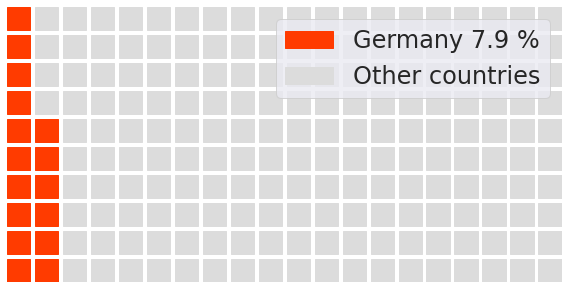

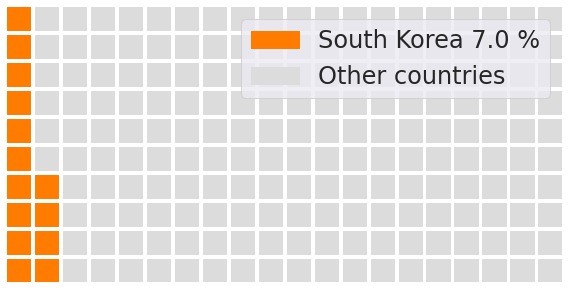

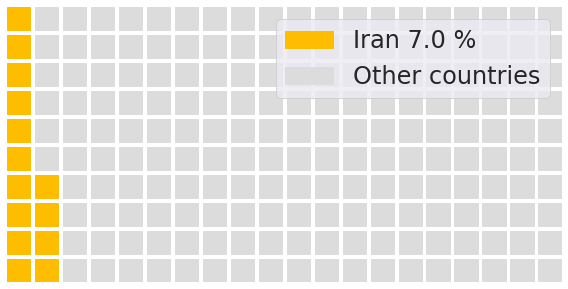

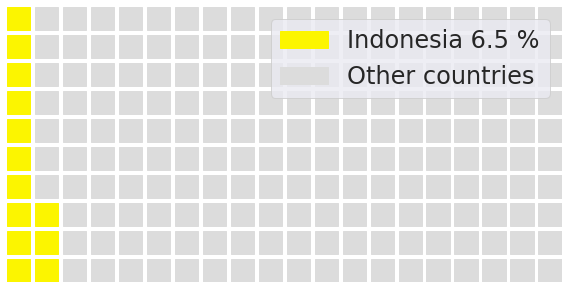

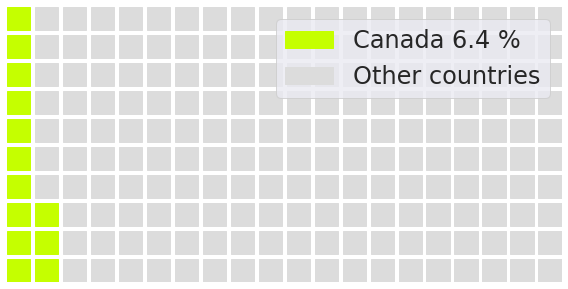

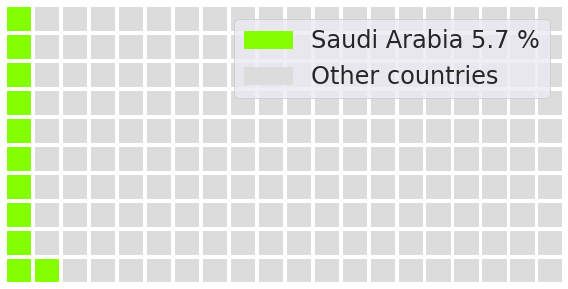

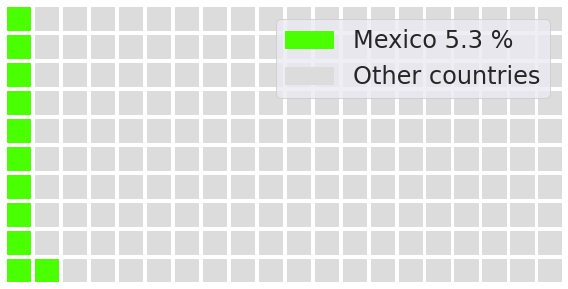

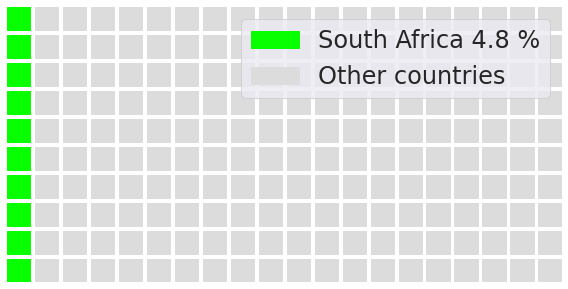

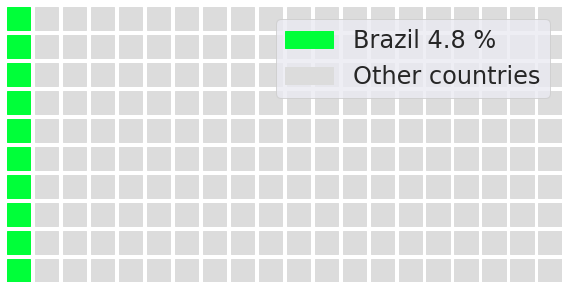

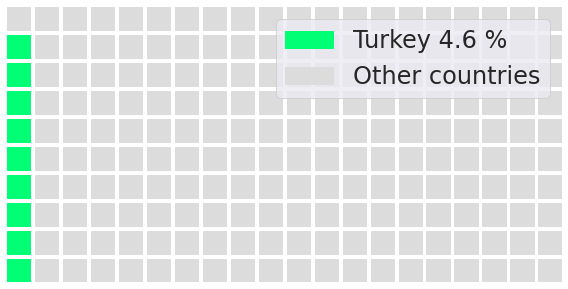

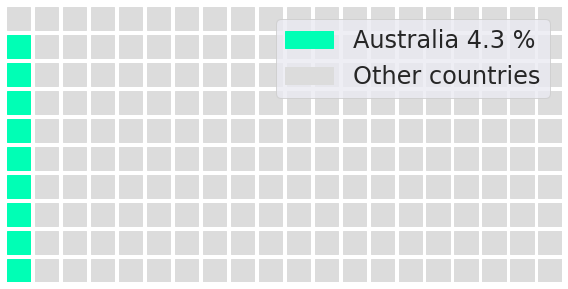

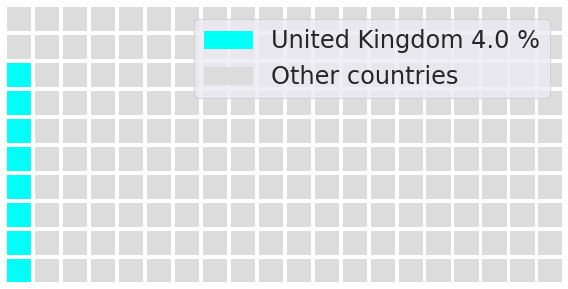

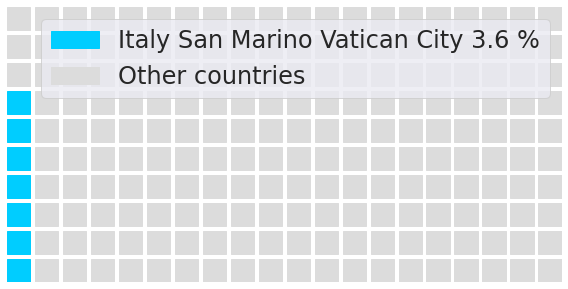

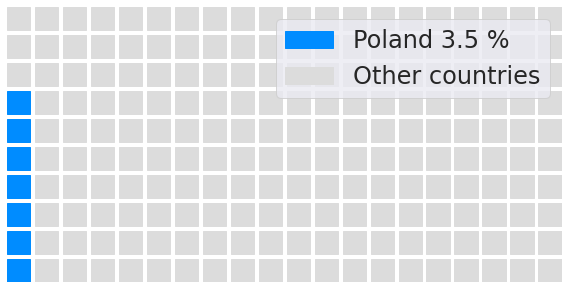

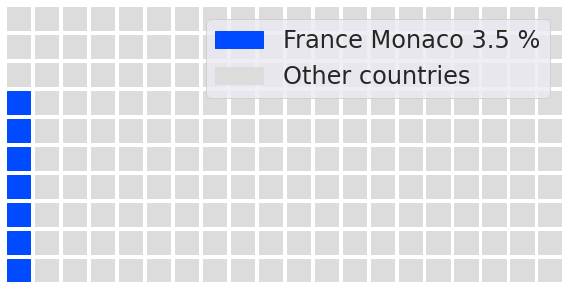

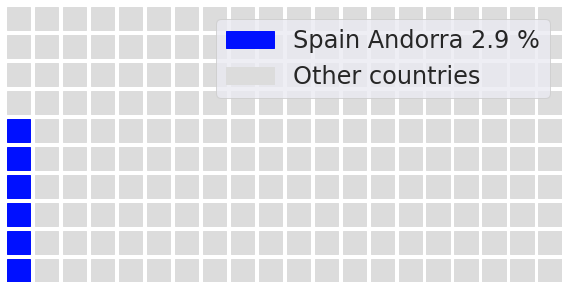

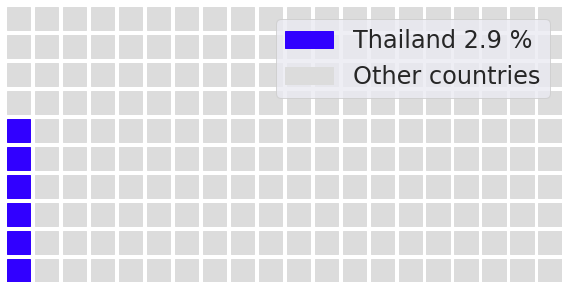

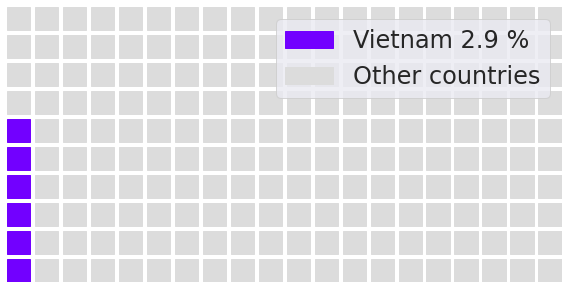

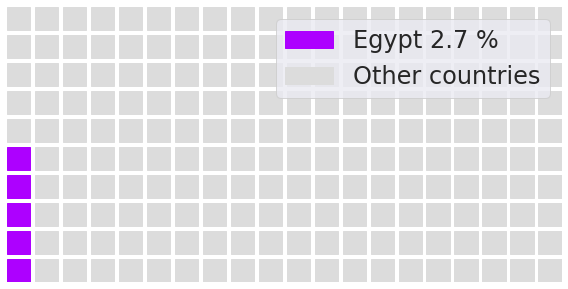

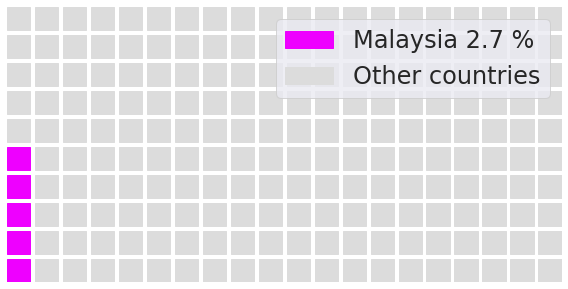

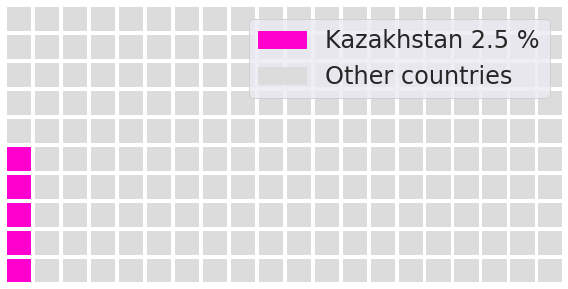

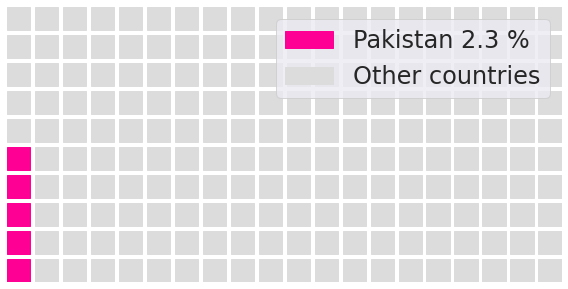

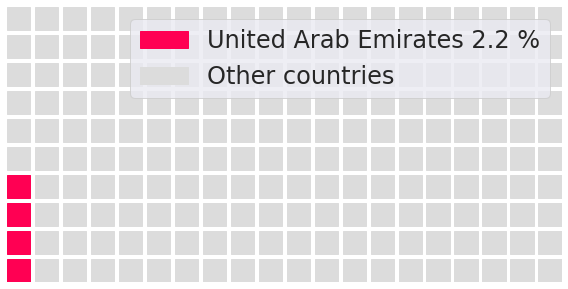

In [ ]:
save_name = []
for i,p,n,c in zip(df_s['emission_2018'], df_s['percentage'], df_s['countries'], pal_hsv):
    fig = plt.figure(FigureClass=Waffle,
                     rows=10, columns=20,
                     values=[i, sum(df_s['emission_2018'])-i], 
                     colors=[c,'gainsboro'],
                     labels=[n + ' ' + str(round(p,1)) +' %','Other countries'],
                     figsize = (8,8),
                     legend={'loc':'upper right', 'bbox_to_anchor': (1, 1), 'fontsize':24}
                    )
    save_name.append('waffle_'+ n + '.png')
    plt.tight_layout()
    plt.savefig('waffle_'+ n + '.png', bbox_inches='tight')   #export_fig
    plt.show()

Agora que temos o gráfico de waffle de cada país, vamos definir uma função para criar uma colagem de fotos. Encontrei um excelente código abaixo para combinar os gráficos do Stack Overflow( link ).https://stackoverflow.com/questions/35438802/making-a-collage-in-pil

In [ ]:
from PIL import Image
def get_collage(cols_n, rows_n, width, height, input_sname, save_name):
    c_width = width//cols_n
    c_height = height//rows_n
    size = c_width, c_height
    new_im = Image.new('RGB', (width, height))
    ims = []
    for p in input_sname:
        im = Image.open(p)
        im.thumbnail(size)
        ims.append(im)
    i, x, y = 0,0,0
    
    for col in range(cols_n):
        for row in range(rows_n):
            print(i, x, y)
            try:
                new_im.paste(ims[i], (x, y))
                i += 1
                y += c_height
            except IndexError:
                pass
        x += c_width
        y = 0
    new_im.save(save_name)

Aplique a função para obter uma colagem de fotos

In [ ]:
# para criar uma colagem de fotos ajustada: 
# largura = número de colunas * largura da figura 
# altura = número de linhas * altura da figura

get_collage(5, 5, 2840, 1445, save_name, 'Collage_waffle.png')

0 0 0
1 0 289
2 0 578
3 0 867
4 0 1156
5 568 0
6 568 289
7 568 578
8 568 867
9 568 1156
10 1136 0
11 1136 289
12 1136 578
13 1136 867
14 1136 1156
15 1704 0
16 1704 289
17 1704 578
18 1704 867
19 1704 1156
20 2272 0
21 2272 289
22 2272 578
23 2272 867
23 2272 867


5. Não alterando nada, mas tornando o gráfico de barras interativo

Podemos transformar um gráfico de barras simples em interativo. Essa é uma boa ideia caso você queira continuar usando o gráfico de barras. O resultado obtido pode ser reproduzido ou filtrado da maneira que os usuários desejarem. Plotly é uma biblioteca útil que ajuda a criar facilmente um gráfico de pizza interativo.

A única preocupação é mostrar o gráfico de barras interativo aos usuários finais; deve haver uma instrução explicando como usar a função.

Traçar um gráfico de barras interativo

In [ ]:
import plotly.express as px
fig = px.bar(df, x='countries', y='emission_2018', text='emission_2018',
             color ='countries', color_discrete_sequence=pal_vi)

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})

fig.update_layout(width=1100, height=500,
                  margin = dict(t=15, l=15, r=15, b=15))
fig.show()

6. Mostrando porcentagens no gráfico de pizza

Um gráfico de pizza é outro gráfico típico na visualização de dados. É basicamente um gráfico estatístico circular dividido em fatias para mostrar a proporção numérica. O gráfico de pizza comum pode ser convertido em interativo para que o resultado possa ser reproduzido ou filtrado. Podemos usar o Plotly para criar um gráfico de pizza interativo.

Assim como no gráfico de barras interativo, deve haver uma instrução explicando como usar a função caso os leitores sejam usuários finais.

Traçar um gráfico de pizza interativo

In [ ]:
import plotly.express as px
fig = px.pie(df_s, values='emission_2018', names='countries',
             color ='countries', color_discrete_sequence=pal_vi)
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  sort=False)
fig.update_layout(width=1000, height=550)
fig.show()

7. Traçar um círculo com um gráfico de radar

Um gráfico de radar é um método gráfico de exibição de dados multivariados . Em comparação, os gráficos de barras são usados ​​principalmente com dados categóricos . Para aplicar o gráfico de radar com dados categóricos, podemos considerar cada categoria como uma variável nos dados multivariados. O valor de cada categoria será plotado a partir do centro.

Com muitas categorias, os usuários podem achar difícil comparar os dados que não estão localizados próximos uns dos outros. Isso pode ser resolvido aplicando o gráfico de radar com dados classificados. Assim, os usuários podem determinar quais valores são maiores ou menores que os demais.

Trace um gráfico de radar com o DataFrame.

In [ ]:
import plotly.express as px
fig = px.line_polar(df, r='emission_2018',
                    theta='countries', line_close=True)
fig.update_traces(fill='toself', line = dict(color=pal_spec[5]))
fig.show()

Trace um gráfico de radar com o DataFrame classificado.

In [ ]:
import plotly.express as px
fig = px.line_polar(df_s, r='emission_2018',
                    theta='countries', line_close=True)
fig.update_traces(fill='toself', line = dict(color=pal_spec[-5]))
fig.show()

8. Usando muitos círculos com um gráfico de bolhas

Teoricamente, um gráfico de bolhas é um gráfico de dispersão com diferentes tamanhos do ponto de dados. Este é um gráfico ideal para exibir dados tridimensionais, valor X, valor Y e tamanho dos dados.

Uma coisa boa sobre a aplicação de um gráfico de bolhas com dados categóricos sem valores X e Y é que podemos localizar as bolhas da maneira que queremos. Por exemplo, o código abaixo mostra como plotar as bolhas verticalmente.

Crie uma lista de valores X, valores Y e rótulos. Em seguida, adicione-os como colunas ao DataFrame. Se você deseja plotar as bolhas na direção horizontal, alterne os valores entre as colunas X e Y.

In [ ]:
#X-axis and Y-axis column
df_s['X'] = [1]*len(df_s)
list_y = list(range(0,len(df_s)))
list_y.reverse()
df_s['Y'] = list_y

#labels column
df_s['labels'] = ['<b>'+i+'<br>'+format(j, ",") for i,j in zip(df_s['countries'], df_s['emission_2018'])]
df_s

,countries,emission_2018,percentage,X,Y,labels
77,Germany,709.54,7.910224,1,22,<b>Germany<br>709.54
178,South Korea,630.87,7.033181,1,21,<b>South Korea<br>630.87
95,Iran,629.29,7.015566,1,20,<b>Iran<br>629.29
94,Indonesia,583.11,6.500734,1,19,<b>Indonesia<br>583.11
36,Canada,574.40,6.403632,1,18,<b>Canada<br>574.4
167,Saudi Arabia,514.60,5.736958,1,17,<b>Saudi Arabia<br>514.6
127,Mexico,472.14,5.263598,1,16,<b>Mexico<br>472.14
177,South Africa,433.25,4.830037,1,15,<b>South Africa<br>433.25
28,Brazil,427.71,4.768275,1,14,<b>Brazil<br>427.71
195,Turkey,412.97,4.603948,1,13,<b>Turkey<br>412.97


Traçar um gráfico de bolhas vertical

In [ ]:
import plotly.express as px
fig = px.scatter(df_s, x='X', y='Y',
                 color='countries', color_discrete_sequence=pal_vi,
                 size='emission_2018', text='labels', size_max=30)

fig.update_layout(width=500, height=1100,
                  margin = dict(t=0, l=0, r=0, b=0),
                  showlegend=False
                 )

fig.update_traces(textposition='middle right')
fig.update_xaxes(showgrid=False, zeroline=False, visible=False)
fig.update_yaxes(showgrid=False, zeroline=False, visible=False)

fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})
fig.show()

Para ir mais longe, podemos exibir as bolhas em diferentes formas. Vamos tentar plotá-los em uma direção circular.

Para fazer isso, precisamos calcular as coordenadas X e Y. Comece dividindo 360 graus pelo número de linhas. Em seguida, converta os graus com as funções Cosseno e Seno para obter as coordenadas X e Y, respectivamente.

In [ ]:
#create X and Y coordinates in a circle
e = 360/len(df)
degree = [i*e for i in list(range(len(df)))]
df_s['X_coor'] = [math.cos(i*math.pi/180) for i in degree]
df_s['Y_coor'] = [math.sin(i*math.pi/180) for i in degree]
df_s

,countries,emission_2018,percentage,X,Y,labels,X_coor,Y_coor
77,Germany,709.54,7.910224,1,22,<b>Germany<br>709.54,1.000000,0.000000
178,South Korea,630.87,7.033181,1,21,<b>South Korea<br>630.87,0.962917,0.269797
95,Iran,629.29,7.015566,1,20,<b>Iran<br>629.29,0.854419,0.519584
94,Indonesia,583.11,6.500734,1,19,<b>Indonesia<br>583.11,0.682553,0.730836
36,Canada,574.40,6.403632,1,18,<b>Canada<br>574.4,0.460065,0.887885
167,Saudi Arabia,514.60,5.736958,1,17,<b>Saudi Arabia<br>514.6,0.203456,0.979084
127,Mexico,472.14,5.263598,1,16,<b>Mexico<br>472.14,-0.068242,0.997669
177,South Africa,433.25,4.830037,1,15,<b>South Africa<br>433.25,-0.334880,0.942261
28,Brazil,427.71,4.768275,1,14,<b>Brazil<br>427.71,-0.576680,0.816970
195,Turkey,412.97,4.603948,1,13,<b>Turkey<br>412.97,-0.775711,0.631088


Traçar as bolhas em uma direção circular

In [ ]:
import plotly.express as px
fig = px.scatter(df_s, x='X_coor', y='Y_coor',
                 color="countries", color_discrete_sequence=pal_vi,
                 size='emission_2018', text='labels', size_max=40)
fig.update_layout(width=800, height=800,
                  margin = dict(t=0, l=0, r=0, b=0),
                  showlegend=False
                 )
fig.update_traces(textposition='bottom center')
fig.update_xaxes(showgrid=False, zeroline=False, visible=False)
fig.update_yaxes(showgrid=False, zeroline=False, visible=False)

fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})
fig.show()

Pode-se notar que quanto mais complexo localizamos as bolhas, mais espaço perdemos. Podemos economizar espaço para outras visualizações com um gráfico de bolhas vertical ou horizontal.

9. Agrupando as bolhas com embalagem Circle

Por fim, vamos agrupar as bolhas sem área de sobreposição. A embalagem circular é uma boa ideia para traçar as bolhas enquanto economiza espaço. Precisamos calcular a posição e o tamanho de cada bolha. Felizmente, existe uma biblioteca chamada circlify que facilita o cálculo.

Uma desvantagem do empacotamento circular é que é difícil descobrir a diferença entre bolhas que têm tamanhos próximos. Isso pode ser resolvido rotulando cada bolha com seu valor.

In [ ]:
# !pip install circlify
import circlify
# compute circle positions:
circles = circlify.circlify(df_s['emission_2018'].tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
circles.reverse()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Trace a embalagem do círculo

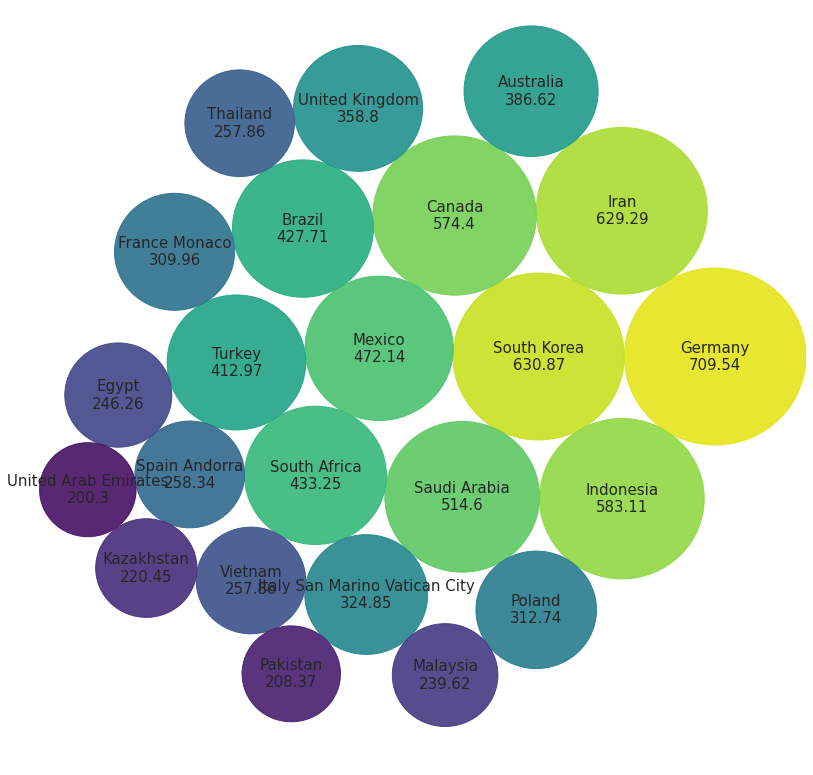

In [ ]:

fig, ax = plt.subplots(figsize=(14, 14), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circles
for circle, label, emi, color in zip(circles, df_s['countries'], df_s['emission_2018'], pal_vi):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color))
    plt.annotate(label +'\n'+ format(emi, ","), (x,y), size=15, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

Resumo
Não há nada de errado com o gráfico de barras. Praticamente, o gráfico de barras é simples e fácil de usar. No entanto, qualquer gráfico é perfeito e adequado para cada trabalho. A visualização de dados às vezes precisa chamar a atenção, como a criação de infográficos, que o gráfico de barras pode não ser capaz de oferecer atratividade.

Este artigo mostrou nove visualizações mostrando a mesma dimensão de dados do gráfico de barras e chamando a atenção. By the way, esses gráficos também têm seus contras. Por favor, considere que eles podem ser difíceis de ler ou inadequados para um relatório oficial.

Se você tiver alguma sugestão ou recomendação, sinta-se à vontade para deixar um comentário. Obrigado por ler.

https://towardsdatascience.com/9-visualizations-that-catch-more-attention-than-a-bar-chart-72d3aeb2e091
